# <div align="center">TITANIC</div>
<div align="center">
    
    
![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/300px-RMS_Titanic_3.jpg)

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster. For more information [Click Here](https://en.wikipedia.org/wiki/RMS_Titanic). </div>

<font color="purple">
Table of content:
1. [Load And Check The Data](#1)
1. [Description Of The Variables](#2)
1. [Univariate variable Analysis](#3)
    * [Categorical Variable Analysis](#4)
    * [Numerical Variable Analysis](#5)
1. [Basic Data Analysis](#6)
    * [Pclass  --  Survived](#pclass-survived)
    * [Sex  --  Survived](#sex-survived)
    * [SibSp  --  Survived](#sibsp-survived)
    * [Parch  --  Survived](#parch-survived)
1. [Outlier Detection](#7)
1. [Visualization](#8)
    * [Correlation between Survived --- Pclass --- Age --- SibSp --- Parch --- Fare](#correlation)
    * [Survived --- SibSp](#SSibSp)
    * [Survived --- Parch](#SParch)
    * [Survived --- Pclass](#SPclass)
    * [Survived --- Age](#SAge)
    * [Survived --- Age --- Gender](#SAgeGender)
    * [Survived --- Pclass --- Gender](#SPclassGender)
1. [Missing Values](#9)
    * [Finding Missing Values](#10)
    * [Filling Missing Values](#11)
        * [Missing Values Of Embarked](#fillEmbarked)
        * [Missing Values Of Fare](#fillFare)
        * [Missing Values Of Age](#fillAge)
1. [Feature Engineering](#12)
    * [Name To Title](#13)
    * [Pclass](#14)
    * [Embarked](#15)
    * [Sex](#16)
    * [Dropping PassengerId, Ticket and Cabin](#17)
1. [Modeling](#18)
    * [Train-Test Split](#19)
    * [Simple Logistic Regression](#20)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#21)
    * [Ensemble Modeling](#22)
1. [Prediction And Submission](#23)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 999;

<IPython.core.display.Javascript object>

<a id="1"></a><br>
# <div align="center"> Loading And Checking The Data </div>


In [3]:
dfTrain = pd.read_csv("/kaggle/input/titanic/train.csv")
dfTest = pd.read_csv("/kaggle/input/titanic/test.csv")

print("\nTrain dataframe info\n")
dfTrain.info()
print("\nTest dataframe info\n")
dfTest.info()


Train dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-

In [4]:
dfTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="2"></a><br>
# <div align="center"> Description Of The Variables </div>

|Variable   | Data Type | Definition                                     | Key                                            |
|-----------|-----------|------------------------------------------------|------------------------------------------------|
|PassengerId| int64     | Unique ID of the passanger                     | 0 = No, 1 = Yes                                |
|Survived   | int64     | Survival status                                | 0 = No, 1 = Yes                                |
|Pclass     | int64     | Ticket class                                   | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
|Name       | object    | Passengers name                                | 	                                              |
|Sex        | object    | Gender of the passenger                        | 	                                              |
|Age        | float64   | Age in years                                   | 	                                              |
|Sibsp      | int64     | Number of siblings / spouses aboard the Titanic| 	                                              |
|Parch      | int64     | Number of parents / children aboard the Titanic| 	                                              |
|Ticket     | object    | Ticket number                                  | 	                                              |
|Fare       | float64   | Passenger fare                                 | 	                                              |
|Cabin      | object    | Cabin number                                   | 	                                              |
|Embarked   | object    | Port of Embarkation                            | C = Cherbourg, Q = Queenstown, S = Southampton |

<a id="3"></a><br>
# <div align="center"> Univariate Variable Analysis </div>

* [Categorical variable analysis](#4)
>     Labels: Survived, Pclass, Sex, SibSp, Parch, Embarked
* [Numerical variable analysis](#5)
>     Labels: Age, Fare 


<a id="4"></a>
### Categorical Variable Analysis


In [6]:
import plotly
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

def PlotPieChart(df,label):
    trace = go.Pie(labels=df[label])
    layout = dict(title = str(label))
    fig = dict(data=[trace], layout=layout)
    iplot(fig)

In [7]:
categoricalLabels = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for label in categoricalLabels:
    PlotPieChart(dfTrain,label)

<a id="5"></a><br>
### Numerical Variable Analysis

In [8]:
import plotly.express as px
def PlotHistogram(df,label):
    fig = px.histogram(df, x=label)
    fig.show()

In [9]:
numericalLabels = ["Age", "Fare"]
for label in numericalLabels:
    PlotHistogram(dfTrain,label)


<a id="6"></a><br>
# <div align="center"> Basic Data Analysis </div>

In this section we will examine the relationships between the two labels based on the [Description of the variables](#2)

These peer tags:
* [Pclass  --  Survived](#pclass-survived)
* [Sex  --  Survived](#sex-survived)
* [SibSp  --  Survived](#sibsp-survived)
* [Parch  --  Survived](#parch-survived)

In [10]:
import plotly.express as px
def relationPieChart(df,value,name):
    fig = px.pie(df, values=value, names=name, title=str(value+" -- "+name))
    fig.show()

<a id="pclass-survived"></a><br>
#### Pclass  --  Survived

In [11]:
print("Surviving probability of Pclasses")
print(dfTrain[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending=False))
relationPieChart(dfTrain,"Survived","Pclass")

Surviving probability of Pclasses
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


<a id="sex-survived"></a><br>
#### Sex  --  Survived

In [12]:
print("Surviving probability of genders")
print(dfTrain[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending=False))
relationPieChart(dfTrain,"Survived","Sex")

Surviving probability of genders
      Sex  Survived
0  female  0.742038
1    male  0.188908


<a id="sibsp-survived"></a><br>
#### SibSp  --  Survived

In [13]:
print("Surviving probability of Sibsps")
print(dfTrain[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending=False))
relationPieChart(dfTrain,"Survived","SibSp")

Surviving probability of Sibsps
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


<a id="parch-survived"></a><br>
#### Parch  --  Survived

In [14]:
print("Surviving probability of Parchs")
print(dfTrain[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending=False))
relationPieChart(dfTrain,"Survived","Parch")

Surviving probability of Parchs
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000



<a id="7"></a><br>
# <div align="center"> Outlier Detection </div>

In [15]:
def detectOutlier(df,features, minOutlierCount):
    outlierList = []
    
    for feature in features:
        #1st quartile
        Q1 = np.percentile(df[feature],25)
        #3rd quartile
        Q3 = np.percentile(df[feature],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier Step
        outlierStep = IQR * 1.5
        #detect outlier and their indices
        outlierListCol = df[(df[feature] < Q1 - outlierStep) | (df[feature] > Q3 + outlierStep)].index
        #store indices
        outlierList.extend(outlierListCol)
    
    outlierIndices = Counter(outlierList)
    multipleOutliers = list(i for i,v in outlierIndices.items() if v > minOutlierCount)
    
    return multipleOutliers

Checking and dropping the rows which has outliers in 2 or more columns(in Age, SibSp, Parch, Fare)

In [16]:
dfTrain.loc[detectOutlier(dfTrain,["Age","SibSp","Parch","Fare"],2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
dfTrain.drop(detectOutlier(dfTrain,["Age","SibSp","Parch","Fare"],2),axis=0,inplace=True)
dfTrain.reset_index(inplace=True,drop=True)

<a id="8"></a><br>
# <div align="center"> Visualization </div>

* [Correlation between Survived --- Pclass --- Age --- SibSp --- Parch --- Fare](#correlation)
* [Survived --- SibSp](#SSibSp)
* [Survived --- Parch](#SParch)
* [Survived --- Pclass](#SPclass)
* [Survived --- Age](#SAge)
* [Survived --- Age --- Gender](#SAgeGender)
* [Survived --- Pclass --- Gender](#SPclassGender)

<a id="correlation"></a><br>
#### Correlation between Survived --- Pclass --- Age --- SibSp --- Parch ---[](http://) Fare

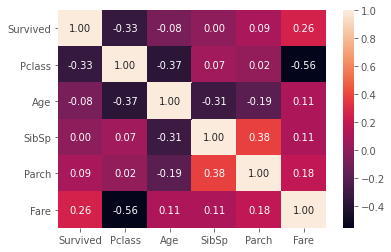

In [18]:
correlationList = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
sns.heatmap(dfTrain[correlationList].corr(), annot=True, fmt=".2f")

<a id="SSibSp"></a><br>
#### Survived --- SibSp

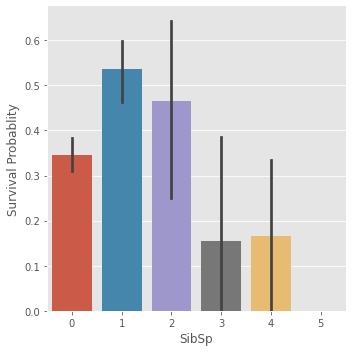

In [19]:
g = sns.factorplot(x = "SibSp", y = "Survived", kind="bar", data=dfTrain,size = 5)
g.set_ylabels("Survival Probablity")
plt.show()

Having a lot of siblings or spouses means less chance to survive according to this dataset. Whereas passengers have 1 or 2 siblings or spouses, have more chance to survive

<a id="SParch"></a><br>
#### Survived --- Parch

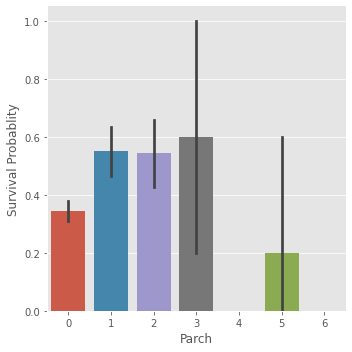

In [20]:
g = sns.factorplot(x = "Parch", y = "Survived", kind="bar", data=dfTrain,size = 5)
g.set_ylabels("Survival Probablity")
plt.show()

* Number of parents/children(Parch) and siblings/spouses(SibSp) aboard the Titanic can be used together to extract a new feature until th=3. 
* small families have more chance to survive.
* there is a high standard deviation in survival of passenger with parch=3.

<a id="SPclass"></a><br>
#### Survived --- Pclass

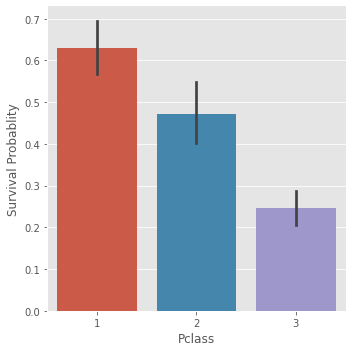

In [21]:
g = sns.factorplot(x = "Pclass", y = "Survived", kind="bar", data=dfTrain,size = 5)
g.set_ylabels("Survival Probablity")
plt.show()

* Higher Pclass passengers has higher survival probablity

<a id="SAge"></a><br>
#### Survived --- Age

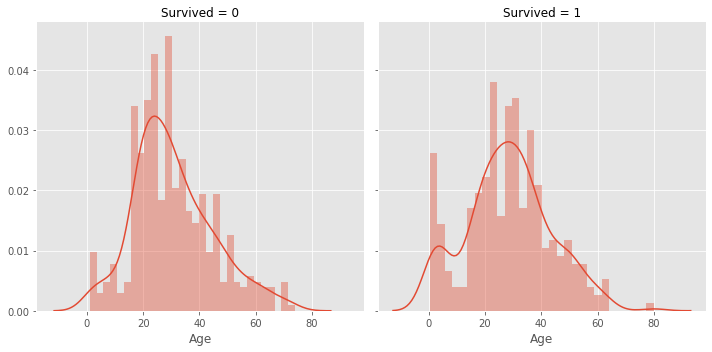

In [22]:
g = sns.FacetGrid(dfTrain,col="Survived",size = 5)
g.map(sns.distplot,"Age",bins=30)
plt.show()

* child ages has higher survival rate.
* large number of 20s ages couldnt survive
* most passengers are in 15-35 age range

<a id="SAgeGender"></a><br>
#### Survived --- Age --- Gender

In [23]:
import plotly.express as px
fig = px.histogram(dfTrain[dfTrain.Survived == 1], x="Age", color="Sex", marginal="violin", title ="Survived passengers by their ages", color_discrete_map={"male": "#187196","female": "#fab7cc"})
fig.show()
fig2 = px.histogram(dfTrain[dfTrain.Survived == 0], x="Age", color="Sex", marginal="violin", title ="Couldnt survived passengers by their ages", color_discrete_map={"male": "#187196","female": "#fab7cc"})
fig2.show()

<a id="SPclassGender"></a><br>
#### Survived --- Pclass --- Gender

In [24]:
fig = px.histogram(dfTrain[dfTrain.Survived == 1], x="Pclass", color="Sex", marginal="violin", title ="Survived passengers by their ticket class", color_discrete_map={"male": "#187196","female": "#fab7cc"})
fig.show()
fig2 = px.histogram(dfTrain[dfTrain.Survived == 0], x="Pclass", color="Sex", marginal="violin", title ="Couldnt survived passengers by their ticket class", color_discrete_map={"male": "#187196","female": "#fab7cc"})
fig2.show()

<a id="9"></a><br>
# <div align="center"> Missing Values </div>

* [Finding missing values](#9)
* [Filling missing values](#10)

<a id="10"></a>
## Finding Missing Values


In [25]:
print("\nTrain dataframe columns that include null values:\n")
print(dfTrain.columns[dfTrain.isna().any()])
print("\nTrain dataframe null rows count:\n")
print(dfTrain.isna().sum())
print("\n================================================")
print("\nTest dataframe columns that include null values:\n")
print(dfTest.columns[dfTest.isna().any()])
print("\nTest dataframe null rows count:\n")
print(dfTest.isna().sum())


Train dataframe columns that include null values:

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

Train dataframe null rows count:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


Test dataframe columns that include null values:

Index(['Age', 'Fare', 'Cabin'], dtype='object')

Test dataframe null rows count:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [26]:
dfTrain[dfTrain.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
dfTest[dfTest.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


<a id="11"></a>
## Filling Missing Values

Labels which will be firstly filled in dataframes
* Train:
    * [Embarked](#fillEmbarked) > 2 missing value
    * [Age](#fillAge) > 170 missing value
* Test:
    * [Fare](#fillFare) > 1 missing value
    * [Age](#fillAge) > 86 missing value

We will temporarily combine the train and test data to fill with more consistent data

In [28]:
dfCombined = pd.concat([dfTrain, dfTest], axis=0)
dfCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 417
Data columns (total 12 columns):
Age            1043 non-null float64
Cabin          292 non-null object
Embarked       1297 non-null object
Fare           1298 non-null float64
Name           1299 non-null object
Parch          1299 non-null int64
PassengerId    1299 non-null int64
Pclass         1299 non-null int64
Sex            1299 non-null object
SibSp          1299 non-null int64
Survived       881 non-null float64
Ticket         1299 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 131.9+ KB


<a id="fillEmbarked"></a>
##### Filling Missing Values Of Embarked Column
Maybe we can analyze train the data by saying that there can be a connection between the ***ticket fare*** and the ***port of embarkation*** information.

In [29]:
fig = px.box(dfCombined, x="Embarked", y="Fare", points="all")
fig.show()

In [30]:
dfTrain[dfTrain.Embarked.isna()][["Fare","Embarked"]]

,Fare,Embarked
60,80.0,NaN
821,80.0,NaN


As we can see from the above box plot and nan values, we can fill the embarked column as **"C"**

In [31]:
dfTrain["Embarked"].fillna("C",inplace=True)
dfTrain.iloc[[60,821]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


<a id="fillFare"></a>
##### Filling Missing Values Of Fare Column
Now we can fill the nan value of **test dataframes fare column**

Here, also, we examine the data by saying that there might be a relationship between ticket ***fares***, ***port of embarkation*** and ***ticket class*** information.

In [32]:
dfTest[dfTest.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


We can fill it by the average fare of the passengers who has same port of embarkation and ticket class 

In [33]:
np.mean(dfCombined[(dfCombined["Pclass"] == 3) & (dfCombined["Embarked"] == "S")]["Fare"])

13.643220739219718

In [34]:
dfTest["Fare"].fillna(np.mean(dfCombined[(dfCombined["Pclass"] == 3) & (dfCombined["Embarked"] == "S")]["Fare"]) , inplace=True)
dfTest.iloc[[152]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.643221,NaN,S


<a id="fillAge"></a>
##### Filling Missing Values Of Age Columns

In [35]:
dfTrain[dfTrain["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [36]:
dfTest[dfTest["Age"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


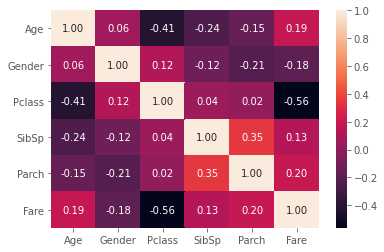

In [37]:
dfCombined["Gender"] = [1 if i == "male" else 0 for i in dfCombined["Sex"]] # make sex variable numerical and store them in gender column to show in heatmap.
correlationList = ["Age", "Gender", "Pclass", "SibSp", "Parch", "Fare"]
sns.heatmap(dfCombined[correlationList].corr(), annot=True, fmt=".2f")
plt.show()
dfCombined.drop(["Gender"],axis=1,inplace=True) # drop the Gender column, because it was necessary for only heatmap.

In [38]:
fig = px.box(dfCombined, x = "Sex", y = "Age", color="Pclass", points="all", title="Correlation between Sex --- Age --- Pclass")
fig.show()

Regardless of gender, 1stclass passengers are older than 2nd class passengers, which are older than 3rd class passengers.

In [39]:
fig = px.box(dfCombined, x = "SibSp", y = "Age", points="all", title="Correlation between Age and SibSp")
fig.show()

In [40]:
fig = px.histogram(dfCombined, x = "Fare", y = "Age", histfunc='avg', title="Correlation between Average Age and Fare")
fig.show()

There is no significant effect between ticket fares and age. The average age of each ticket is very close to each other

In [41]:
fig = px.box(dfCombined, x = "Parch", y = "Age", points="all", title="Correlation between Age and Parch")
fig.show()

Certain number ranges can cover different age ranges, in parent/child(Parch) values

In [42]:
trainIndexNanAge = list(dfTrain[dfTrain["Age"].isna()].index)
print("number of nan age train indexes : {}".format(len(trainIndexNanAge)))
testIndexNanAge = list(dfTest[dfTest["Age"].isna()].index)
print("number of nan age test indexes : {}".format(len(testIndexNanAge)))
combinedIndexNanAge = list(dfCombined[dfCombined["Age"].isna()].index)
print("number of total nan age indexes : {}".format(len(combinedIndexNanAge)))

number of nan age train indexes : 170
number of nan age test indexes : 86
number of total nan age indexes : 256


We will fill the nan values with the ages median of the same passengers which has same siblings/spouses, parent/childs and pclass

In [43]:
for index in trainIndexNanAge:
    age_pred = dfCombined["Age"][((dfCombined["SibSp"] == dfTrain.iloc[index]["SibSp"]) & (dfCombined["Parch"] == dfTrain.iloc[index]["Parch"]) & (dfCombined["Pclass"] == dfTrain.iloc[index]["Pclass"]))].median()
    if not np.isnan(age_pred):
        dfTrain["Age"].iloc[index] = age_pred

In [44]:
for index in testIndexNanAge:
    age_pred = dfCombined["Age"][((dfCombined["SibSp"] == dfTest.iloc[index]["SibSp"]) & (dfCombined["Parch"] == dfTest.iloc[index]["Parch"]) & (dfCombined["Pclass"] == dfTest.iloc[index]["Pclass"]))].median()
    if not np.isnan(age_pred):
        dfTest["Age"].iloc[index] = age_pred

After this filling we have still two age values empty in the test dataframe 

In [45]:
trainIndexNanAge = list(dfTrain[dfTrain["Age"].isna()].index)
print("number of nan age train indexes : {}".format(len(trainIndexNanAge)))
testIndexNanAge = list(dfTest[dfTest["Age"].isna()].index)
print("number of nan age test indexes : {}".format(len(testIndexNanAge)))
dfCombined = pd.concat([dfTrain, dfTest], axis=0)
combinedIndexNanAge = list(dfCombined[dfCombined["Age"].isna()].index)
print("number of total nan age indexes : {}".format(len(combinedIndexNanAge)))

number of nan age train indexes : 0
number of nan age test indexes : 2
number of total nan age indexes : 2


Since this passenger data does not match other passengers, we fill them using the median of all passengers age value

In [46]:
age_med = dfCombined["Age"].median()
for index in trainIndexNanAge:
    dfTrain["Age"].iloc[index] = age_med
for index in testIndexNanAge:
    dfTest["Age"].iloc[index] = age_med

In [47]:
trainIndexNanAge = list(dfTrain[dfTrain["Age"].isna()].index)
print("number of nan age train indexes : {}".format(len(trainIndexNanAge)))
testIndexNanAge = list(dfTest[dfTest["Age"].isna()].index)
print("number of nan age test indexes : {}".format(len(testIndexNanAge)))
dfCombined = pd.concat([dfTrain, dfTest], axis=0)
combinedIndexNanAge = list(dfCombined[dfCombined["Age"].isna()].index)
print("number of total nan age indexes : {}".format(len(combinedIndexNanAge)))
del dfCombined, combinedIndexNanAge, testIndexNanAge, trainIndexNanAge

number of nan age train indexes : 0
number of nan age test indexes : 0
number of total nan age indexes : 0


Now we have no empty row on **age** column in both dataframes.

<a id="12"></a><br>
# <div align="center"> Feature Engineering </div>

* [Name To Title](#13)
* [Pclass](#14)
* [Embarked](#15)
* [Sex](#16)
* [Dropping Passenger Id, Ticket and Cabin](#17)

<a id="13"></a>
## Name To Title

There can not be a relationship between the name and the possibility of survive, but there may be a relationship between the title information inside the names.

In [48]:
def find_title(name):
    return name.split(",")[1].split(".")[0].strip()

In [49]:
dfTrain["Title"] = dfTrain["Name"].apply(find_title)
dfTest["Title"] = dfTest["Name"].apply(find_title)
print("Used Different Titles Are:")
print(pd.concat([dfTrain,dfTest],axis=0)["Title"].value_counts())

Used Different Titles Are:
Mr              753
Miss            255
Mrs             197
Master           60
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Jonkheer          1
the Countess      1
Sir               1
Dona              1
Mme               1
Don               1
Capt              1
Name: Title, dtype: int64


Considering that we can not learn very few passing data, we can name them as "Other".

In [50]:
other_list = ["Rev", "Dr", "Col", "Major", "Ms", "Mlle", "Jonkheer", "Lady", "Mme", "Dona", "Capt", "the Countess", "Sir", "Don"]
dfTrain["Title"] = dfTrain["Title"].replace(other_list, "Other")
dfTest["Title"] = dfTest["Title"].replace(other_list, "Other")
print("Used Different Titles Are:")
print(pd.concat([dfTrain,dfTest],axis=0)["Title"].value_counts())

Used Different Titles Are:
Mr        753
Miss      255
Mrs       197
Master     60
Other      34
Name: Title, dtype: int64


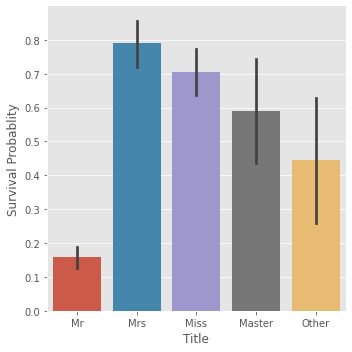

In [51]:
g = sns.factorplot(x = "Title", y = "Survived", kind="bar", data=dfTrain, size = 5)
g.set_ylabels("Survival Probablity")
plt.show()

Now we can convert this 5 title variables into dummy/indicator variables.

In [52]:
dfTrain.drop(["Name"], axis=1, inplace=True)
dfTest.drop(["Name"], axis=1, inplace=True)

dfTrain["Title"] = dfTrain["Title"].astype("category")
dfTrain = pd.get_dummies(dfTrain,columns=["Title"])
dfTest["Title"] = dfTest["Title"].astype("category")
dfTest = pd.get_dummies(dfTest,columns=["Title"])

print("Train dataframe columns: {}".format(dfTrain.columns.values))
print("Test dataframe columns: {}".format(dfTest.columns.values))

Train dataframe columns: ['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket'
 'Fare' 'Cabin' 'Embarked' 'Title_Master' 'Title_Miss' 'Title_Mr'
 'Title_Mrs' 'Title_Other']
Test dataframe columns: ['PassengerId' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs'
 'Title_Other']


<a id="14"></a>
## Pclass

the 3 Pclass variables.

In [53]:
dfTrain["Pclass"] = dfTrain["Pclass"].astype("category")
dfTrain = pd.get_dummies(dfTrain,columns=["Pclass"])

dfTest["Pclass"] = dfTest["Pclass"].astype("category")
dfTest = pd.get_dummies(dfTest,columns=["Pclass"])

print("Train dataframe columns: {}".format(dfTrain.columns.values))
print("Test dataframe columns: {}".format(dfTest.columns.values))

Train dataframe columns: ['PassengerId' 'Survived' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs'
 'Title_Other' 'Pclass_1' 'Pclass_2' 'Pclass_3']
Test dataframe columns: ['PassengerId' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Embarked' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs'
 'Title_Other' 'Pclass_1' 'Pclass_2' 'Pclass_3']


<a id="15"></a>
## Embarked

the 3 Embarked variables.

In [54]:
dfTrain["Embarked"] = dfTrain["Embarked"].astype("category")
dfTrain = pd.get_dummies(dfTrain,columns=["Embarked"])

dfTest["Embarked"] = dfTest["Embarked"].astype("category")
dfTest = pd.get_dummies(dfTest,columns=["Embarked"])

print("Train dataframe columns: {}".format(dfTrain.columns.values))
print("Test dataframe columns: {}".format(dfTest.columns.values))

Train dataframe columns: ['PassengerId' 'Survived' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Other'
 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Embarked_C' 'Embarked_Q' 'Embarked_S']
Test dataframe columns: ['PassengerId' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Other'
 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Embarked_C' 'Embarked_Q' 'Embarked_S']


<a id="16"></a>
## Sex

And finally the 2 gender variables.

In [55]:
dfTrain["Sex"] = dfTrain["Sex"].astype("category")
dfTrain = pd.get_dummies(dfTrain,columns=["Sex"], prefix="S")

dfTest["Sex"] = dfTest["Sex"].astype("category")
dfTest = pd.get_dummies(dfTest,columns=["Sex"], prefix="S")

print("Train dataframe columns: {}".format(dfTrain.columns.values))
print("Test dataframe columns: {}".format(dfTest.columns.values))

Train dataframe columns: ['PassengerId' 'Survived' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Other'
 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'S_female' 'S_male']
Test dataframe columns: ['PassengerId' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Cabin'
 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Other'
 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'S_female' 'S_male']


<a id="17"></a>
## Dropping Passenger Id, Ticket and Cabin

We drop the unnecessary **Ticket**, **Cabin** and **PassengerId** columns. But we do not drop **PassengerID** in the **test** database. Because we will use it in the *submission phase*.

In [56]:
dfTrain.drop(["Ticket","Cabin","PassengerId"], axis=1, inplace=True)
dfTest.drop(["Ticket","Cabin"], axis=1, inplace=True)

print("Train dataframe columns: {}".format(dfTrain.columns.values))
print("Test dataframe columns: {}".format(dfTest.columns.values))

Train dataframe columns: ['Survived' 'Age' 'SibSp' 'Parch' 'Fare' 'Title_Master' 'Title_Miss'
 'Title_Mr' 'Title_Mrs' 'Title_Other' 'Pclass_1' 'Pclass_2' 'Pclass_3'
 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'S_female' 'S_male']
Test dataframe columns: ['PassengerId' 'Age' 'SibSp' 'Parch' 'Fare' 'Title_Master' 'Title_Miss'
 'Title_Mr' 'Title_Mrs' 'Title_Other' 'Pclass_1' 'Pclass_2' 'Pclass_3'
 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'S_female' 'S_male']


In [57]:
dfTrain.head()

,Survived,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,S_female,S_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,0,1,0,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,1,0,0,1,0,1


In [58]:
dfTest.head()

,PassengerId,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,S_female,S_male
0,892,34.5,0,0,7.8292,0,0,1,0,0,0,0,1,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,0,1,0,0,0,1,0,0,1,1,0
2,894,62.0,0,0,9.6875,0,0,1,0,0,0,1,0,0,1,0,0,1
3,895,27.0,0,0,8.6625,0,0,1,0,0,0,0,1,0,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,0,1,0,0,0,1,0,0,1,1,0


<a id="18"></a><br>
# <div align="center"> Modeling </div>

* [Train-Test Split](#19)
* [Simple Logistic Regression](#20)
* [Hyperparameter Tuning -- Grid Search -- Cross Validation](#21)
* [Ensemble Modeling](#22)

In [59]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [60]:
dfTrain = (dfTrain - np.min(dfTrain)) / (np.max(dfTrain) - np.min(dfTrain)).values
dfTestTemp = dfTest["PassengerId"]
dfTest = (dfTest - np.min(dfTest)) / (np.max(dfTest) - np.min(dfTest)).values
dfTest["PassengerId"] = dfTestTemp
del dfTestTemp
dfTest.describe()

,PassengerId,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,S_female,S_male
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.385840,0.055921,0.043594,0.069437,0.050239,0.186603,0.574163,0.172249,0.016746,0.255981,0.222488,0.521531,0.244019,0.110048,0.645933,0.363636,0.636364
std,120.810458,0.170928,0.112095,0.109048,0.109014,0.218700,0.390059,0.495062,0.378049,0.128474,0.436934,0.416416,0.500135,0.430019,0.313324,0.478803,0.481622,0.481622
min,892.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.287881,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,0.327443,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1204.750000,0.477450,0.125000,0.000000,0.061429,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1309.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="19"></a>
## Train-Test Split

In [61]:
xTrain = dfTrain.drop(["Survived"], axis = 1)
yTrain = dfTrain["Survived"]
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size = 0.33, random_state = 50)
print("sizes: ")
print("xTrain: {}, xValidation: {}, yTrain: {}, yValidation: {}".format(len(xTrain),len(xVal),len(yTrain),len(yVal)))
print("\t\t\t test: {}".format(len(dfTest)))

sizes: 
xTrain: 590, xValidation: 291, yTrain: 590, yValidation: 291
			 test: 418


<a id="20"></a>
## Simple Logistic Regression

In [62]:
logreg = LogisticRegression()
logreg.fit(xTrain,yTrain)
acc_logreg_train = logreg.score(xTrain,yTrain)*100
acc_logreg_validation = logreg.score(xVal,yVal)*100
print("Train data accuracy: {}".format(acc_logreg_train))
print("Validation data accuracy: {}".format(acc_logreg_validation))

Train data accuracy: 84.23728813559322
Validation data accuracy: 81.09965635738831


<a id="21"></a>
## Hyperparameter Tuning -- Grid Search -- Cross Validation

**In this section the 5 popular ML classifier will be compared by their mean accuracy using stratified cross validation**

> Decision Tree

> SVM

> Random Forest

> KNN

> Logistic Regression

In [63]:
classifiers = [DecisionTreeClassifier(random_state = 50),
               SVC(random_state = 50),
               RandomForestClassifier(random_state = 50),
               KNeighborsClassifier(),
               LogisticRegression(random_state = 50)]

decisionTree_params_grid = {"min_samples_split":range(10,500,20),
                            "max_depth":range(1,20,2)}
svc_params_grid = {"kernel":["rbf"],
                   "gamma":[0.001,0.01,0.1,1],
                   "C":[1,10,50,100,200],
                   "probability":[True]}
randomForest_params_grid = {"max_features":[1,3,10],
                            "min_samples_split":[2,3,10],
                            "min_samples_leaf":[1,3,10],
                            "bootstrap":[False],
                            "n_estimators":[100,300],
                            "criterion":["gini"]}
knn_params_grid = {"n_neighbors":np.linspace(1,19,10,dtype=int).tolist(),
                   "weights":["uniform","distance"],
                   "metric":["euclidean","manhattan"]}
logisticRegression_params_grid = {"C":np.logspace(-3,3,7),
                                  "penalty":["l1","l2"]}


classifier_params = [decisionTree_params_grid,
                     svc_params_grid,
                     randomForest_params_grid,
                     knn_params_grid,
                     logisticRegression_params_grid]

In [64]:
cvResult = []
bestEstimators = []
for classifierIndex in range(len(classifiers)):
    classifier = GridSearchCV(classifiers[classifierIndex], param_grid=classifier_params[classifierIndex], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs=-1 , verbose=1)
    classifier.fit(xTrain,yTrain)
    cvResult.append(classifier.best_score_)
    bestEstimators.append(classifier.best_estimator_)
    print("current best score = {}".format(cvResult[classifierIndex]))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


current best score = 0.8491525423728813
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


current best score = 0.8474576271186441
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.4min finished


current best score = 0.864406779661017
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


current best score = 0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.6s


current best score = 0.8338983050847458


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.8s finished


In [65]:
cvResult = pd.DataFrame({"Cross Validation Means": cvResult, "ML Models":[
    "Decision Tree Classifier",
    "SVM",
    "Random Forest Classifier",
    "K Neighbors Classifier",
    "Logistic Regression"]})

In [66]:
fig = px.bar(cvResult, x='ML Models', y='Cross Validation Means', title="Cross Validation Scores")
fig.show()

<a id="22"></a>
## Ensemble Modeling

In [67]:
votingClassifier = VotingClassifier(estimators = [("decissionTree",bestEstimators[0]),
                                                  ("randomForest",bestEstimators[2]),
                                                  ("logisticRegression",bestEstimators[4])],
                                    voting = "soft",
                                    n_jobs = -1)

In [68]:
votingClassifier = votingClassifier.fit(xTrain,yTrain)
print("Train data accuracy: {}".format(accuracy_score(votingClassifier.predict(xTrain),yTrain)))
print("Validation data accuracy: {}".format(accuracy_score(votingClassifier.predict(xVal),yVal)))

Train data accuracy: 0.9016949152542373
Validation data accuracy: 0.8006872852233677


<a id="23"></a><br>
# <div align="center"> Prediction And Submission </div>

In [69]:
survivedTest = pd.Series(votingClassifier.predict(dfTest.drop(["PassengerId"],axis=1)),name="Survived").astype(int)
results = pd.concat([dfTest["PassengerId"], survivedTest],axis = 1)
results.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [70]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [71]:
results.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.392344
std,120.810458,0.488858
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [72]:
results.to_csv("titanic.csv", index = False)